In [66]:
%matplotlib inline
import pandas as pd

### Load Country dataframe: 
One row per country 247 rows × 31 columns; additionally, contains 33 rows for aggregate data (e.g. world, regions, income groupings)

In [67]:
country = pd.DataFrame.from_csv('data/Country.csv', index_col = None)
country.head()

,CountryCode,ShortName,TableName,LongName,Alpha2Code,CurrencyUnit,SpecialNotes,Region,IncomeGroup,Wb2Code,...,GovernmentAccountingConcept,ImfDataDisseminationStandard,LatestPopulationCensus,LatestHouseholdSurvey,SourceOfMostRecentIncomeAndExpenditureData,VitalRegistrationComplete,LatestAgriculturalCensus,LatestIndustrialData,LatestTradeData,LatestWaterWithdrawalData
0,AFG,Afghanistan,Afghanistan,Islamic State of Afghanistan,AF,Afghan afghani,Fiscal year end: March 20; reporting period fo...,South Asia,Low income,AF,...,Consolidated central government,General Data Dissemination System (GDDS),1979,"Multiple Indicator Cluster Survey (MICS), 2010/11","Integrated household survey (IHS), 2008",NaN,2013/14,NaN,2013.0,2000.0
1,ALB,Albania,Albania,Republic of Albania,AL,Albanian lek,NaN,Europe & Central Asia,Upper middle income,AL,...,Budgetary central government,General Data Dissemination System (GDDS),2011,"Demographic and Health Survey (DHS), 2008/09",Living Standards Measurement Study Survey (LSM...,Yes,2012,2011.0,2013.0,2006.0
2,DZA,Algeria,Algeria,People's Democratic Republic of Algeria,DZ,Algerian dinar,NaN,Middle East & North Africa,Upper middle income,DZ,...,Budgetary central government,General Data Dissemination System (GDDS),2008,"Multiple Indicator Cluster Survey (MICS), 2012","Integrated household survey (IHS), 1995",NaN,NaN,2010.0,2013.0,2001.0
3,ASM,American Samoa,American Samoa,American Samoa,AS,U.S. dollar,NaN,East Asia & Pacific,Upper middle income,AS,...,NaN,NaN,2010,NaN,NaN,Yes,2007,NaN,NaN,NaN
4,ADO,Andorra,Andorra,Principality of Andorra,AD,Euro,NaN,Europe & Central Asia,High income: nonOECD,AD,...,NaN,NaN,2011. Population data compiled from administra...,NaN,NaN,Yes,NaN,NaN,2006.0,NaN


In [68]:
#ID all rows that are aggregated, not one single country (33) 
country[country.CurrencyUnit.isnull()]

,CountryCode,ShortName,TableName,LongName,Alpha2Code,CurrencyUnit,SpecialNotes,Region,IncomeGroup,Wb2Code,...,GovernmentAccountingConcept,ImfDataDisseminationStandard,LatestPopulationCensus,LatestHouseholdSurvey,SourceOfMostRecentIncomeAndExpenditureData,VitalRegistrationComplete,LatestAgriculturalCensus,LatestIndustrialData,LatestTradeData,LatestWaterWithdrawalData
7,ARB,Arab World,Arab World,Arab World,1A,NaN,Arab World aggregate. Arab World is composed o...,NaN,NaN,1A,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
35,CSS,Caribbean small states,Caribbean small states,Caribbean small states,S3,NaN,Caribbean small states aggregate. Includes Ant...,NaN,NaN,S3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
38,CEB,Central Europe and the Baltics,Central Europe and the Baltics,Central Europe and the Baltics,B8,NaN,Central Europe and the Baltics aggregate.,NaN,NaN,B8,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
59,EAS,East Asia & Pacific (all income levels),East Asia & Pacific (all income levels),East Asia & Pacific (all income levels),Z4,NaN,East Asia and Pacific regional aggregate (incl...,NaN,NaN,Z4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
60,EAP,East Asia & Pacific (developing only),East Asia & Pacific,East Asia & Pacific (developing only),4E,NaN,East Asia and Pacific regional aggregate (does...,NaN,NaN,4E,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
68,EMU,Euro area,Euro area,Euro area,XC,NaN,Euro area aggregate.,NaN,NaN,XC,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
69,ECS,Europe & Central Asia (all income levels),Europe & Central Asia (all income levels),Europe & Central Asia (all income levels),Z7,NaN,Europe and Central Asia regional aggregate (in...,NaN,NaN,Z7,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
70,ECA,Europe & Central Asia (developing only),Europe & Central Asia,Europe & Central Asia (developing only),7E,NaN,Europe and Central Asia regional aggregate (do...,NaN,NaN,7E,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
71,EUU,European Union,European Union,European Union,EU,NaN,European Union aggregate.,NaN,NaN,EU,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75,FCS,Fragile and conflict affected situations,Fragile and conflict affected situations,Fragile situations,F1,NaN,Fragile situations aggregate. Note: Countries...,NaN,NaN,F1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Load 'Series' dataframe, renamed as metrics: 
One row per series/metric, columns provide defintions, units, periodicity sources, etc.; 1345 rows × 20 columns

In [69]:
metrics = pd.DataFrame.from_csv('data/Series.csv', index_col = None)
metrics.head()

,SeriesCode,Topic,IndicatorName,ShortDefinition,LongDefinition,UnitOfMeasure,Periodicity,BasePeriod,OtherNotes,AggregationMethod,LimitationsAndExceptions,NotesFromOriginalSource,GeneralComments,Source,StatisticalConceptAndMethodology,DevelopmentRelevance,RelatedSourceLinks,OtherWebLinks,RelatedIndicators,LicenseType
0,BN.KLT.DINV.CD,Economic Policy & Debt: Balance of payments: C...,"Foreign direct investment, net (BoP, current US$)",NaN,Foreign direct investment are the net inflows ...,NaN,Annual,NaN,NaN,NaN,NaN,NaN,Note: Data are based on the sixth edition of t...,"International Monetary Fund, Balance of Paymen...",NaN,NaN,NaN,NaN,NaN,Open
1,BX.KLT.DINV.WD.GD.ZS,Economic Policy & Debt: Balance of payments: C...,"Foreign direct investment, net inflows (% of GDP)",NaN,Foreign direct investment are the net inflows ...,NaN,Annual,NaN,NaN,Weighted average,FDI data do not give a complete picture of int...,NaN,Note: Data starting from 2005 are based on the...,"International Monetary Fund, International Fin...",Data on equity flows are based on balance of p...,Private financial flows - equity and debt - ac...,NaN,NaN,NaN,Open
2,BX.KLT.DINV.CD.WD,Economic Policy & Debt: Balance of payments: C...,"Foreign direct investment, net inflows (BoP, c...",NaN,Foreign direct investment refers to direct inv...,NaN,Annual,NaN,NaN,Sum,FDI data do not give a complete picture of int...,NaN,Note: Data starting from 2005 are based on the...,"International Monetary Fund, Balance of Paymen...",Data on equity flows are based on balance of p...,Private financial flows - equity and debt - ac...,NaN,NaN,NaN,Open
3,BM.KLT.DINV.GD.ZS,Economic Policy & Debt: Balance of payments: C...,"Foreign direct investment, net outflows (% of ...",NaN,Foreign direct investment are the net inflows ...,NaN,Annual,NaN,NaN,Weighted average,NaN,NaN,Note: Data are based on the sixth edition of t...,"International Monetary Fund, International Fin...",NaN,NaN,NaN,NaN,NaN,Open
4,BN.TRF.KOGT.CD,Economic Policy & Debt: Balance of payments: C...,"Net capital account (BoP, current US$)",NaN,Net capital account records acquisitions and d...,NaN,Annual,NaN,NaN,NaN,NaN,NaN,Note: Data are based on the sixth edition of t...,"International Monetary Fund, Balance of Paymen...",NaN,NaN,NaN,NaN,NaN,Open


In [70]:
# Look at the categories included in the series grouping "Topic" 
metrics.IndicatorName[metrics.IndicatorName.str.contains('GDP per capita')]

295                     GDP per capita growth (annual %)
309                        GDP per capita (constant LCU)
389                   GDP per capita (constant 2005 US$)
409                         GDP per capita (current LCU)
410                         GDP per capita (current US$)
493    GDP per capita, PPP (constant 2011 internation...
494        GDP per capita, PPP (current international $)
540    Government expenditure per student, primary (%...
541    Government expenditure per student, secondary ...
542    Government expenditure per student, tertiary (...
Name: IndicatorName, dtype: object

In [71]:
#Highlevel topic categories
splitTopics = metrics.Topic.str.partition(':')
splitTopics.groupby([0,2]).size()
#splitTopics[splitTopics[0].str.contains('Health')].groupby([0,2]).size()

0                          2                                                                          
Economic Policy & Debt      Balance of payments: Capital & financial account                              11
                            Balance of payments: Current account: Balances                                 4
                            Balance of payments: Current account: Goods, services & income                22
                            Balance of payments: Current account: Transfers                                7
                            Balance of payments: Reserves & other items                                    6
                            External debt: Amortization                                                   18
                            External debt: Arrears, reschedulings, etc.                                   22
                            External debt: Commitments                                                     5
                         

Look at all Health metrics to determine best proxy of health --> SP.DYN.LE00.IN : Life expectancy at birth, total (years)

In [72]:
metrics[metrics.Topic.str.contains('Mortality')]

,SeriesCode,Topic,IndicatorName,ShortDefinition,LongDefinition,UnitOfMeasure,Periodicity,BasePeriod,OtherNotes,AggregationMethod,LimitationsAndExceptions,NotesFromOriginalSource,GeneralComments,Source,StatisticalConceptAndMethodology,DevelopmentRelevance,RelatedSourceLinks,OtherWebLinks,RelatedIndicators,LicenseType
813,SH.DTH.COMM.ZS,Health: Mortality,"Cause of death, by communicable diseases and m...",NaN,Cause of death refers to the share of all deat...,NaN,Annual,NaN,NaN,Weighted average,The limited availability of data on health sta...,NaN,NaN,Derived based on the data from WHO's World Hea...,Data on cause of death are compiled by the WHO...,NaN,NaN,NaN,NaN,Open
814,SH.DTH.INJR.ZS,Health: Mortality,"Cause of death, by injury (% of total)",NaN,Cause of death refers to the share of all deat...,NaN,Annual,NaN,NaN,Weighted average,The limited availability of data on health sta...,NaN,NaN,Derived based on the data from WHO's World Hea...,Data on cause of death are compiled by the WHO...,NaN,NaN,NaN,NaN,Open
815,SH.DTH.NCOM.ZS,Health: Mortality,"Cause of death, by non-communicable diseases (...",NaN,Cause of death refers to the share of all deat...,NaN,Annual,NaN,NaN,Weighted average,The limited availability of data on health sta...,NaN,NaN,Derived based on the data from WHO's World Hea...,Data on cause of death are compiled by the WHO...,NaN,NaN,NaN,NaN,Open
816,SP.DTH.INFR.ZS,Health: Mortality,Completeness of infant death reporting (% of r...,NaN,Completeness of infant death reporting is the ...,NaN,Annual,NaN,NaN,NaN,NaN,NaN,NaN,The United Nations Statistics Division's Popul...,NaN,NaN,NaN,NaN,NaN,Open
817,SP.DTH.REPT.ZS,Health: Mortality,Completeness of total death reporting (% of re...,NaN,Completeness of total death reporting is the n...,NaN,Annual,NaN,NaN,Weighted average,NaN,NaN,NaN,The United Nations Statistics Division's Popul...,NaN,NaN,NaN,NaN,NaN,Open
818,SP.DYN.LE00.FE.IN,Health: Mortality,"Life expectancy at birth, female (years)",Life expectancy at birth indicates the average...,Life expectancy at birth indicates the number ...,NaN,Annual,NaN,NaN,Weighted average,Complete vital registration systems are not co...,NaN,NaN,(1) United Nations Population Division. World ...,Life expectancy at birth used here is the aver...,Mortality rates for different age groups (infa...,NaN,NaN,NaN,Open
819,SP.DYN.LE00.MA.IN,Health: Mortality,"Life expectancy at birth, male (years)",Life expectancy at birth indicates the average...,Life expectancy at birth indicates the number ...,NaN,Annual,NaN,NaN,Weighted average,Complete vital registration systems are not co...,NaN,NaN,(1) United Nations Population Division. World ...,Life expectancy at birth used here is the aver...,Mortality rates for different age groups (infa...,NaN,NaN,NaN,Open
820,SP.DYN.LE00.IN,Health: Mortality,"Life expectancy at birth, total (years)",Life expectancy at birth indicates the average...,Life expectancy at birth indicates the number ...,NaN,Annual,NaN,NaN,Weighted average,Complete vital registration systems are not co...,NaN,NaN,Derived from male and female life expectancy a...,Life expectancy at birth used here is the aver...,Mortality rates for different age groups (infa...,NaN,NaN,NaN,Open
821,SP.DYN.AMRT.FE,Health: Mortality,"Mortality rate, adult, female (per 1,000 femal...",NaN,Adult mortality rate is the probability of dyi...,NaN,Annual,NaN,NaN,Weighted average,Complete vital registration systems are fairly...,NaN,NaN,(1) United Nations Population Division. World ...,The main sources of mortality data are vital r...,Mortality rates for different age groups (infa...,NaN,NaN,NaN,Open
822,SP.DYN.AMRT.MA,Health: Mortality,"Mortality rate, adult, male (per 1,000 male ad...",NaN,Adult mortality rate is the probability of dyi...,NaN,Annual,NaN,NaN,Weighted average,Complete vital registration systems are fairly...,NaN,NaN,(1) United Nations Population Division. World ...,The main sources of mortality data are vital r...,Mortality rates for different age gro

Look at all Health metrics to determine best proxy of health --> 
SP.DYN.LE00.IN : Life expectancy at birth, total (years)

In [73]:
metrics[metrics.IndicatorName.str.contains('GDP per capita')]

,SeriesCode,Topic,IndicatorName,ShortDefinition,LongDefinition,UnitOfMeasure,Periodicity,BasePeriod,OtherNotes,AggregationMethod,LimitationsAndExceptions,NotesFromOriginalSource,GeneralComments,Source,StatisticalConceptAndMethodology,DevelopmentRelevance,RelatedSourceLinks,OtherWebLinks,RelatedIndicators,LicenseType
295,NY.GDP.PCAP.KD.ZG,Economic Policy & Debt: National accounts: Gro...,GDP per capita growth (annual %),NaN,Annual percentage growth rate of GDP per capit...,NaN,Annual,NaN,NaN,Weighted average,NaN,NaN,NaN,"World Bank national accounts data, and OECD Na...","For more information, see the metadata for con...",NaN,NaN,NaN,NaN,Open
309,NY.GDP.PCAP.KN,Economic Policy & Debt: National accounts: Loc...,GDP per capita (constant LCU),NaN,GDP per capita is gross domestic product divid...,NaN,Annual,varies by country,NaN,NaN,NaN,NaN,NaN,"World Bank national accounts data, and OECD Na...",NaN,NaN,NaN,NaN,NaN,Open
389,NY.GDP.PCAP.KD,Economic Policy & Debt: National accounts: US$...,GDP per capita (constant 2005 US$),NaN,GDP per capita is gross domestic product divid...,NaN,Annual,2005,NaN,Weighted average,NaN,NaN,NaN,"World Bank national accounts data, and OECD Na...","For more information, see the metadata for con...",NaN,NaN,NaN,NaN,Open
409,NY.GDP.PCAP.CN,Economic Policy & Debt: National accounts: US$...,GDP per capita (current LCU),NaN,GDP per capita is gross domestic product divid...,NaN,Annual,NaN,NaN,NaN,NaN,NaN,NaN,"World Bank national accounts data, and OECD Na...",NaN,NaN,NaN,NaN,NaN,Open
410,NY.GDP.PCAP.CD,Economic Policy & Debt: National accounts: US$...,GDP per capita (current US$),NaN,GDP per capita is gross domestic product divid...,NaN,Annual,NaN,NaN,Weighted average,NaN,NaN,NaN,"World Bank national accounts data, and OECD Na...","For more information, see the metadata for cur...",NaN,NaN,NaN,NaN,Open
493,NY.GDP.PCAP.PP.KD,Economic Policy & Debt: Purchasing power parity,"GDP per capita, PPP (constant 2011 internation...",NaN,GDP per capita based on purchasing power parit...,NaN,Annual,2011,NaN,Weighted average,NaN,NaN,NaN,"World Bank, International Comparison Program d...",NaN,NaN,NaN,NaN,NaN,Open
494,NY.GDP.PCAP.PP.CD,Economic Policy & Debt: Purchasing power parity,"GDP per capita, PPP (current international $)",NaN,GDP per capita based on purchasing power parit...,NaN,Annual,NaN,NaN,Weighted average,NaN,NaN,NaN,"World Bank, International Comparison Program d...","For more information, see the metadata for PPP...",NaN,NaN,NaN,NaN,Open
540,SE.XPD.PRIM.PC.ZS,Education: Inputs,"Government expenditure per student, primary (%...",NaN,Government expenditure per student is the aver...,NaN,Annual,NaN,NaN,Median,NaN,NaN,NaN,"United Nations Educational, Scientific, and Cu...",General government expenditure per student in ...,NaN,NaN,NaN,NaN,Open
541,SE.XPD.SECO.PC.ZS,Education: Inputs,"Government expenditure per student, secondary ...",NaN,Government expenditure per student is the aver...,NaN,Annual,NaN,NaN,Median,NaN,NaN,NaN,"United Nations Educational, Scientific, and Cu...",General government expenditure per student in ...,NaN,NaN,NaN,NaN,Open
542,SE.XPD.TERT.PC.ZS,Education: Inputs,"Government expenditure per student, tertiary (...",NaN,Government expenditure per student is the aver...,NaN,Annual,NaN,NaN,Median,NaN,NaN,NaN,"United Nations Educational, Scientific, and Cu...",General government expenditure per student in ...,NaN,NaN,NaN,NaN,Open


### Load Indicators dataframe, renamed as 'df': 
contains one row per indicator per country per year; 5656458 rows × 6 columns

In [74]:
df = pd.DataFrame.from_csv('data/indicators.csv', index_col=None)
df.head(5)

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
0,Arab World,ARB,"Adolescent fertility rate (births per 1,000 wo...",SP.ADO.TFRT,1960,1.335609e+02
1,Arab World,ARB,Age dependency ratio (% of working-age populat...,SP.POP.DPND,1960,8.779760e+01
2,Arab World,ARB,"Age dependency ratio, old (% of working-age po...",SP.POP.DPND.OL,1960,6.634579e+00
3,Arab World,ARB,"Age dependency ratio, young (% of working-age ...",SP.POP.DPND.YG,1960,8.102333e+01
4,Arab World,ARB,Arms exports (SIPRI trend indicator values),MS.MIL.XPRT.KD,1960,3.000000e+06


Assess frequency of null values for specific metrics, by country and indicators (count is the number of years with data per country). Of per-capita-measures of GDP, the following value is most-densely populated: 
NY.GDP.PCAP.CD	GDP per capita (current US$)

In [75]:
df[df.IndicatorName.str.contains('GDP per capita')].groupby(['CountryName', 'IndicatorName']).size().unstack()

IndicatorName,GDP per capita (constant 2005 US$),GDP per capita (constant LCU),GDP per capita (current LCU),GDP per capita (current US$),GDP per capita growth (annual %),"GDP per capita, PPP (constant 2011 international $)","GDP per capita, PPP (current international $)",Government expenditure per primary student as % of GDP per capita (%),Government expenditure per secondary student as % of GDP per capita (%),Government expenditure per tertiary student as % of GDP per capita (%)
CountryName,,,,,,,,,,
Afghanistan,13.0,13.0,36.0,36.0,12.0,13.0,13.0,NaN,NaN,NaN
Albania,35.0,35.0,35.0,31.0,34.0,25.0,25.0,NaN,NaN,NaN
Algeria,55.0,55.0,55.0,55.0,54.0,25.0,25.0,4.0,4.0,NaN
American Samoa,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN
Andorra,44.0,44.0,44.0,44.0,43.0,NaN,NaN,9.0,9.0,5.0
Angola,1.0,18.0,29.0,29.0,17.0,1.0,1.0,NaN,NaN,2.0
Antigua and Barbuda,38.0,38.0,38.0,38.0,37.0,25.0,25.0,1.0,2.0,1.0
Arab World,40.0,NaN,NaN,47.0,39.0,25.0,25.0,NaN,NaN,NaN
Argentina,55.0,55.0,55.0,53.0,54.0,NaN,NaN,15.0,15.0,15.0


In [76]:
df[df.IndicatorName.str.contains('Life expectancy')].groupby(['CountryName', 'IndicatorName']).size().unstack().head()

IndicatorName,"Life expectancy at birth, female (years)","Life expectancy at birth, male (years)","Life expectancy at birth, total (years)"
CountryName,,,
Afghanistan,54,54,54
Albania,54,54,54
Algeria,54,54,54
Angola,54,54,54
Antigua and Barbuda,54,54,54


## Data wrangling
1. Transform the data frame into a more workable state, usig Pivot_table() 
2. Interpolate missing values for the LifeExpectancy data set

In [88]:
#Life Expectancy - World
le_world = df[(df.CountryName == 'World') & (df.IndicatorCode == 'SP.DYN.LE00.IN')]
le_world = le_world.pivot_table(values='Value', index=['CountryName','Year'], columns=['IndicatorName'])
le_world.head()

IndicatorName     Life expectancy at birth, total (years)
CountryName Year                                         
World       1960                                52.499842
            1961                                53.004380
            1962                                53.471810
            1963                                54.097448
            1964                                54.913004

In [92]:
#GDP for world
gdp_world = df[(df.IndicatorCode =='NY.GDP.PCAP.CD') & (df.CountryName =='World')]
gdp_world = gdp_world.pivot_table(values='Value', index=['CountryName', 'Year'], columns=['IndicatorName'])
gdp_world.head()

IndicatorName     GDP per capita (current US$)
CountryName Year                              
World       1960                    450.289472
            1961                    462.285277
            1962                    487.959281
            1963                    514.438304
            1964                    552.413459

In [96]:
#Just life expectency for the US
le_us = df[(df.CountryName =='United States') & (df.IndicatorCode == 'SP.DYN.LE00.IN')]
le_us = le_us.pivot_table(values='Value', index=['CountryName','Year'], columns=['IndicatorName'])

In [95]:
#GDP for US
gdp_us = df[(df.IndicatorCode =='NY.GDP.PCAP.CD') & (df.CountryName =='United States')]
gdp_us = gdp_us.pivot_table(values='Value', index=['CountryName', 'Year'], columns=['IndicatorName'])

In [102]:
# New series with the change in GDP and LE each year
gdp_us_diff = gdp_us['GDP per capita (current US$)'].diff()
le_us_diff = le_us['Life expectancy at birth, total (years)'].diff()

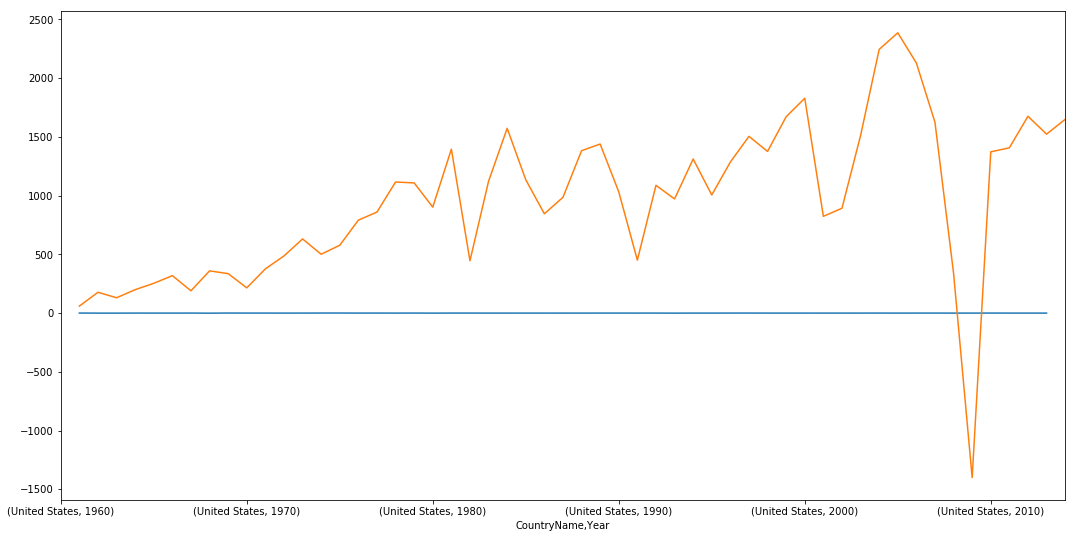

In [105]:
ax= le_us_diff.plot(figsize=(18,9))
gdp_us_diff.plot(ax= ax)

#Cant see any change in the plue line. should plot on 2 axes

### Creating dictionaries for specific indicators
Where the key is country and the values is a series with indicator values by year

The goal was so I could quickly replicate my work for each country - but putting down and first focusing on structuring my approach for one country

In [78]:
l_countries = list(set(df['CountryName']))  #list of unique country names
d_gdp = {}  # declare empty dictionary for gdp
d_le = {}  #empty dictionary for life expectancy

columns = ['CountryName','Year', 'Value']
df1 = pd.DataFrame(df, columns=columns)

In [87]:
#create a GDP series per country 
for i in l_countries: 
    x = df[(df.CountryName == i) & (df.IndicatorCode == 'NY.GDP.PCAP.CD')]  #gdp
    x = pd.DataFrame(x,columns=columns)
    x = x.reset_index
    d_gdp[i] = x

In [86]:
#d_gdp['United States'].head(2)

In [ ]:
#create a life expectancy series per country 
for i in l_countries: 
    x = df[(df.CountryName == i) & (df.IndicatorCode == 'SP.DYN.LE00.IN')]  #life expectancy
    x = pd.DataFrame(x,columns=columns)
    d_le[i] = x